In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os
sys.path.append('/home/andy/Documents/software')
import getdata, sqlutilpy

import numpy as np, healpy as hp, h5py, pandas as pd
from scipy import stats, special, linalg, optimize
import scipy
import tqdm

# Plotting modules
import matplotlib.pyplot as plt, matplotlib
import matplotlib
from pylab import cm
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', labelsize=16)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
plt.rc('legend',fontsize=16)
plt.rc('font',size=16)

In [3]:
import warnings
warnings.filterwarnings("ignore", message="You are modifying the state of a globally registered colormap.")
warnings.filterwarnings("ignore", message="Passing parameters norm and vmin/vmax simultaneously is deprecated")
warnings.filterwarnings("ignore", message="divide by zero encountered")
warnings.filterwarnings("ignore", message="overflow encountered in exp")

In [4]:
file = "gaia_edr3.gaia_source_b80"
cardinal = "south"
size = 700000
# Load Sample
#keys = {'phot_g_mean_mag':'phot_g_mean_mag', 'parallax':'parallax', 'b':'b', 'parallax_error':'parallax_error', }
keys = ['source_id', 'phot_g_corr', 'parallax', 'b', 'parallax_error', 'zeropoint']
sample = {};
filename="/data/asfe2/Projects/mwtrace_data/gaia/%s.h" % file
with h5py.File(filename, 'r') as hf:
    subset = ( ~np.isnan(hf[cardinal]['phot_g_corr'][...]) )
    print('%d/%d' % (np.sum(subset), len(subset)))
    subsample  = np.sort(np.random.choice(np.arange(np.sum(subset)), size=size, replace=False))
    for key in keys:
        sample[key]=hf[cardinal][key][...][subset][subsample]
sample['sinb'] = np.sin(np.deg2rad(sample['b']))
sample['parallax_obs'] = sample['parallax']-sample['zeropoint']
sample['m']  = sample['phot_g_corr'].copy()

729653/729881


## Apparent magnitude

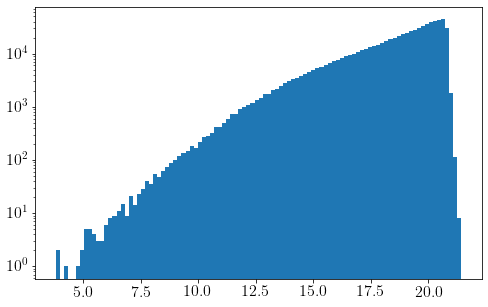

In [15]:
plt.figure(figsize=(8,5))
plt.hist(sample['phot_g_corr'], bins=100);
plt.yscale('log')

In [7]:
sample['M'] = sample['m'] + 5*(np.log10(sample['parallax_obs'])-2)

/home/andy/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


In [5]:
np.max(sample['m'])

21.435204

Text(0.5, 0, '$1/\\varpi$ (kpc)')

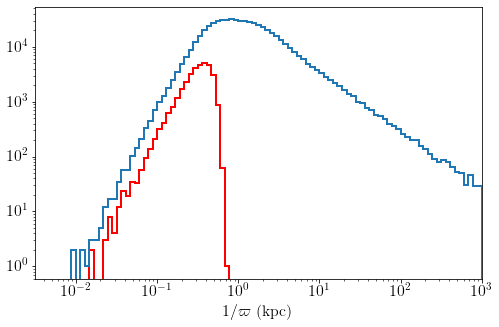

In [23]:
fig, ax = plt.subplots(1,1,figsize=(8,5))

xlim = (-2.5,3)
plt.hist(1/sample['parallax'][sample['M']>12], bins=np.logspace(*xlim,100), color='r', histtype='step', linewidth=2);
plt.hist(1/sample['parallax'], bins=np.logspace(*xlim,100), histtype='step', linewidth=2);
plt.xlim(10**xlim[0], 10**xlim[1])

plt.xscale('log'), plt.yscale('log'); plt.xlabel(r'$1/\varpi$ (kpc)')

Text(0.5, 0, '$\\varpi/\\sigma_\\varpi$')

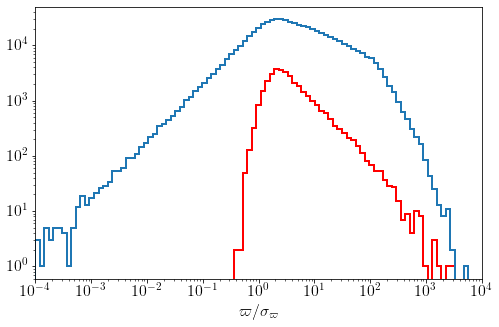

In [29]:
fig, ax = plt.subplots(1,1,figsize=(8,5))

xlim = (-4,4)
plt.hist((sample['parallax']/sample['parallax_error'])[sample['M']>12], bins=np.logspace(*xlim,100), color='r', histtype='step', linewidth=2);
plt.hist(sample['parallax']/sample['parallax_error'], bins=np.logspace(*xlim,100), histtype='step', linewidth=2);
plt.xlim(10**xlim[0], 10**xlim[1])

plt.xscale('log'), plt.yscale('log'); plt.xlabel(r'$\varpi/\sigma_\varpi$')

In [32]:
np.median((sample['parallax']/sample['parallax_error'])[sample['M']>12]), np.median((sample['parallax']/sample['parallax_error']))

(2.988251245461485, 2.491761469033009)

Text(0.5, 0, '$M_G$')

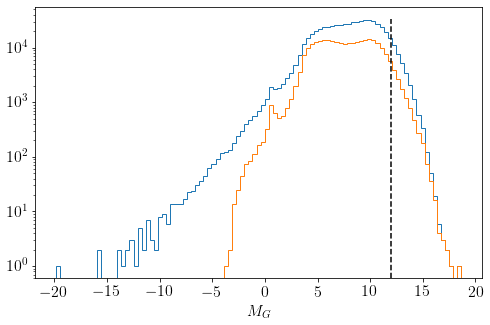

In [33]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
minmax = np.nanmin(sample['M']), np.nanmax(sample['M'])

plt.hist(sample['M'], bins=np.linspace(*minmax, 100), histtype='step');
plt.hist(sample['M'][sample['parallax_obs']/sample['parallax_error']>4], 
         bins=np.linspace(*minmax, 100), histtype='step');

plt.plot([12,12], ax.get_ylim(), '--k')

plt.yscale('log'); plt.xlabel(r'$M_G$')